In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns

In [2]:
dataset_dividido_folder = 'brain_tumor_dataset_dividido/'

treino_folder = 'treino/'
teste_folder = 'teste/'

dataset_dividido_folder_treino = dataset_dividido_folder + treino_folder
dataset_dividido_folder_teste = dataset_dividido_folder + teste_folder

In [3]:
datagen_treino = ImageDataGenerator(rescale = 1./255,
                                    vertical_flip=True,
                                    horizontal_flip=True,
                                    validation_split=0.25) #25% dos 75% iniciais, para validação

datagen_teste = ImageDataGenerator(rescale = 1./255)

In [4]:
seed = 123

dados_treino = datagen_treino.flow_from_directory(
    dataset_dividido_folder_treino,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = 30,
    class_mode="binary",
    subset='training',
    seed = seed)

dados_validacao = datagen_treino.flow_from_directory(
    dataset_dividido_folder_treino,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = 30,
    class_mode="binary",
    subset='validation',
    seed = seed)

dados_teste = datagen_teste.flow_from_directory(
    dataset_dividido_folder_teste,
    target_size = (150,150),
    color_mode = "grayscale",
    batch_size = 30,
    class_mode = 'binary')

print(dados_treino.class_indices)

Found 142 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 64 images belonging to 2 classes.
{'no': 0, 'yes': 1}


In [5]:
def build_model():
    model = Sequential()

    model.add(Conv2D(20,(3,3), input_shape = (150,150,1), activation = 'relu'))
    model.add(Flatten())
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(loss = "binary_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ['accuracy'])
    
    return model

In [6]:
Reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.001)
checkpointer = ModelCheckpoint(filepath="best_weights_simple_cnn.hdf5", monitor = 'val_accuracy', verbose=1, save_best_only=True)
callbacks = [Reduce_learning_rate, checkpointer]

model = build_model()
history = model.fit(dados_treino, validation_data = dados_validacao, epochs = 50, callbacks = callbacks)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 5 steps, validate for 2 steps
Epoch 1/50
4/5 [=======================>......] - ETA: 0s - loss: 1.5845 - accuracy: 0.5179
Epoch 00001: val_accuracy improved from -inf to 0.91489, saving model to best_weights_simple_dense.hdf5
5/5 [==============================] - 2s 342ms/step - loss: 1.4726 - accuracy: 0.5070 - val_loss: 0.3318 - val_accuracy: 0.9149
Epoch 2/50
4/5 [=======================>......] - ETA: 0s - loss: 0.9903 - accuracy: 0.7411
Epoch 00002: val_accuracy did not improve from 0.91489
5/5 [==============================] - 1s 198ms/step - loss: 0.9352 - accuracy: 0.7465 - val_loss: 0.4245 - val_accuracy: 0.8085
Epoch 3/50
4/5 [=======================>......] - ETA: 0s - loss: 0.6485 - accuracy: 0.7589
Epoch 00003: val_accuracy did not improve from 0.91489
5/5 [==============================] - 1s 209ms/step - loss: 0.5968 - accuracy: 0.7746 - val_loss: 0.6393 - val_accuracy: 0.6596
Epoch 4/50
4/5 [=================

In [7]:
model.evaluate(dados_teste)

  ...
    to  
  ['...']
3/3 [==============================] - 0s 108ms/step - loss: 0.8730 - accuracy: 0.7969


[0.8730404625336329, 0.796875]

In [8]:
model_best_weights = build_model()
model_best_weights.load_weights('best_weights_simple_cnn.hdf5')

model_best_weights.evaluate(dados_teste)

  ...
    to  
  ['...']
3/3 [==============================] - 0s 101ms/step - loss: 0.6680 - accuracy: 0.7188


[0.6679790019989014, 0.71875]

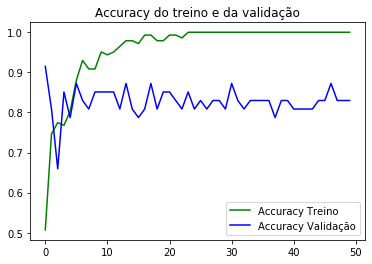

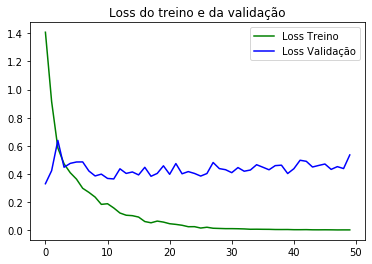

In [9]:
#Visualizar gráficos
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

#Gráfico Accuracy
plt.plot(epochs, accuracy, 'b', color = 'green', label = 'Accuracy Treino')
plt.plot(epochs, val_accuracy, 'b', label = 'Accuracy Validação')
plt.title('Accuracy do treino e da validação')
plt.legend()
plt.figure()

#Gráfico Loss
plt.plot(epochs, loss, 'b', color = 'green', label = 'Loss Treino')
plt.plot(epochs, val_loss, 'b', label = 'Loss Validação')
plt.title('Loss do treino e da validação')
plt.legend()
plt.show()